In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from time import time

from gillespie.sir import SIRG

Simulating 100000 initial conditions...
Simulation done in 4.460277080535889 seconds.


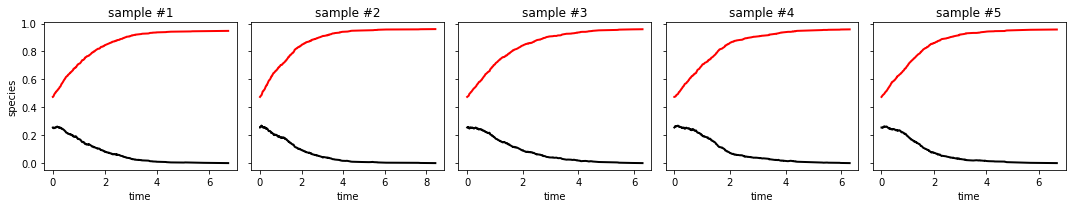

In [2]:
## test the new class
random_state = 1

sir = SIRG(random_state = random_state+1)

y0 = np.zeros(2,)
y0[0] = 0.02;   # initial condition for y1 (I, infected species)
y0[1] = 0.00;   # initial condition for y2 (R, recovered species)

n_initials = 100000
rng = np.random.default_rng(random_state+0)
    
# create random initial conditions
initial_condition = rng.uniform(low=0,high=0.5, size=(1, 2))
y0 = np.ones((n_initials,1)) @ initial_condition

print(f"Simulating {n_initials} initial conditions...")

t0 = time()
# note that even though we simulate until time_max=15, the results stop before that (when y1 = 0 internally)
t, y = sir.simulate(y0, time_max=15, time_step=1e-2)

print(f"Simulation done in {time()-t0} seconds.")

fig,ax = plt.subplots(1,5, figsize=(15,3),sharey=True)
for k in range(5):
    ax[k].plot(t[k],y[k][:,0], color='black', lineWidth=2);
    ax[k].plot(t[k],y[k][:,1], color='red', lineWidth=2);
    ax[k].set_xlabel("time")
    if k == 0:
        ax[k].set_ylabel("species")
    ax[k].set_title(f"sample #{k+1}")

fig.tight_layout()